### Import Library

In [1]:
# !pip install pandas numpy scikit-learn xgboost matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             r2_score, mean_absolute_percentage_error)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('C:/Users/muham/OneDrive/Documents/KULIAH SEMESTER 7/MACHINE LEARNING/UTS/midterm-regresi-dataset.csv', header=None)

print(f"Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows:")
display(df.head())

# Rename columns untuk clarity
column_names = ['year'] + [f'feature_{i}' for i in range(1, df.shape[1])]
df.columns = column_names

print(f"\nDataset Info:")
print(f"Total rows: {len(df):,}")
print(f"Total features: {df.shape[1] - 1}")  # -1 karena 1 kolom adalah target
print(f"Target column: 'year'")

# Basic statistics
print(f"\nTarget Variable Statistics (Year):")
print(df['year'].describe())

Data loaded successfully!
Dataset shape: (515345, 91)
Memory usage: 357.79 MB

First 5 rows:


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903



Dataset Info:
Total rows: 515,345
Total features: 90
Target column: 'year'

Target Variable Statistics (Year):
count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: year, dtype: float64


> Code Block diatas digunakan untuk membaca dataset dan memberikan gambaran umum tentang dataset tersebut. Selain itu, dilakukan juga "Rename" kolom untuk mempermudah analisis selanjutnya.

### Target Distribution


Year Statistics:
Min year: 1922
Max year: 2011
Mean year: 1998.40
Median year: 2002.0
Range: 89 years


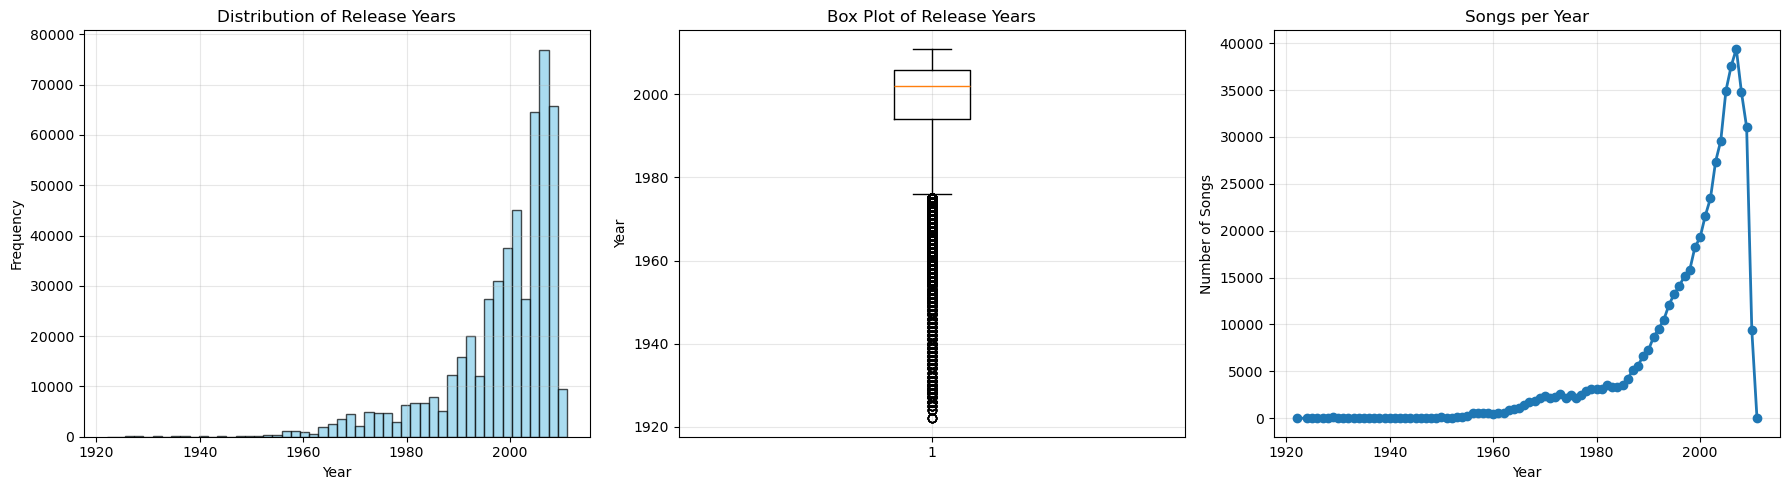

In [3]:
print(f"\nYear Statistics:")
print(f"Min year: {df['year'].min()}")
print(f"Max year: {df['year'].max()}")
print(f"Mean year: {df['year'].mean():.2f}")
print(f"Median year: {df['year'].median()}")
print(f"Range: {df['year'].max() - df['year'].min()} years")

# Visualisasi distribusi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['year'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Release Years')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['year'], vert=True)
axes[1].set_ylabel('Year')
axes[1].set_title('Box Plot of Release Years')
axes[1].grid(alpha=0.3)

# Line plot (count per year)
year_counts = df['year'].value_counts().sort_index()
axes[2].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Songs')
axes[2].set_title('Songs per Year')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Bertujuan untuk memvisualisasikan distribusi dari data target (year) agar lebih mudah dipahami. Selain itu untuk melihat apakah data terdistribusi secara merata ataupun apakah ada kecenderungan tertentu pada sesuatu.

### EDA

In [4]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"\nColumns with missing values: {len(missing_df)}")
    display(missing_df)
else:
    print(f"\nNo missing values found!")


No missing values found!


> Code Block diatas berfungsi untuk menghitung seberapa banyak nilai **missing** atau hilang di setiap kolom. Tujuan dari menghitung banyaknya nilai yang hilang adalah untuk membersihkan dataset agar dapat diolah.

In [5]:
# Check outliers in target variable using IQR method
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]

print(f"\nOutlier Analysis (IQR Method):")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print(f"\nOutlier years: {sorted(outliers['year'].unique())}")


Outlier Analysis (IQR Method):
Q1 (25th percentile): 1994.0
Q3 (75th percentile): 2006.0
IQR: 12.0
Lower bound: 1976.0
Upper bound: 2024.0
Number of outliers: 29703 (5.76%)

Outlier years: [1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975]


> Digunakan untuk mendeteksi dan menganalisis outlier pada variabel target untuk memastikan data yang digunakan dalam model tidak terpengaruh oleh nilai-nilai ekstrim yang dapat memengaruhi hasil analisis.

In [7]:
# Get feature columns (exclude target)
feature_cols = [col for col in df.columns if col != 'year']

# Basic statistics for features
print(f"\nFeature Statistics:")
feature_stats = df[feature_cols].describe()
display(feature_stats)

# Check feature ranges
print(f"\nFeature Value Ranges:")
for col in feature_cols[:10]:  # Show first 10 features
    print(f"{col}: [{df[col].min():.2f}, {df[col].max():.2f}]")


Feature Statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,-2.444850,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,1.783520,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,6.147220,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630



Feature Value Ranges:
feature_1: [1.75, 61.97]
feature_2: [-337.09, 384.07]
feature_3: [-301.01, 322.85]
feature_4: [-154.18, 335.77]
feature_5: [-181.95, 262.07]
feature_6: [-81.79, 166.24]
feature_7: [-188.21, 172.40]
feature_8: [-72.50, 126.74]
feature_9: [-126.48, 146.30]
feature_10: [-41.63, 60.35]



Top 20 Features Most Correlated with Year:


feature_1     0.225374
feature_6     0.187443
feature_3     0.139541
feature_63    0.126348
feature_40    0.123974
feature_7     0.110460
feature_67    0.102841
feature_46    0.101324
feature_36    0.101007
feature_69    0.099484
feature_12    0.097164
feature_57    0.096973
feature_47    0.096088
feature_59    0.092747
feature_33    0.091186
feature_78    0.087386
feature_20    0.087057
feature_73    0.083755
feature_74    0.081748
feature_68    0.081341
dtype: float64

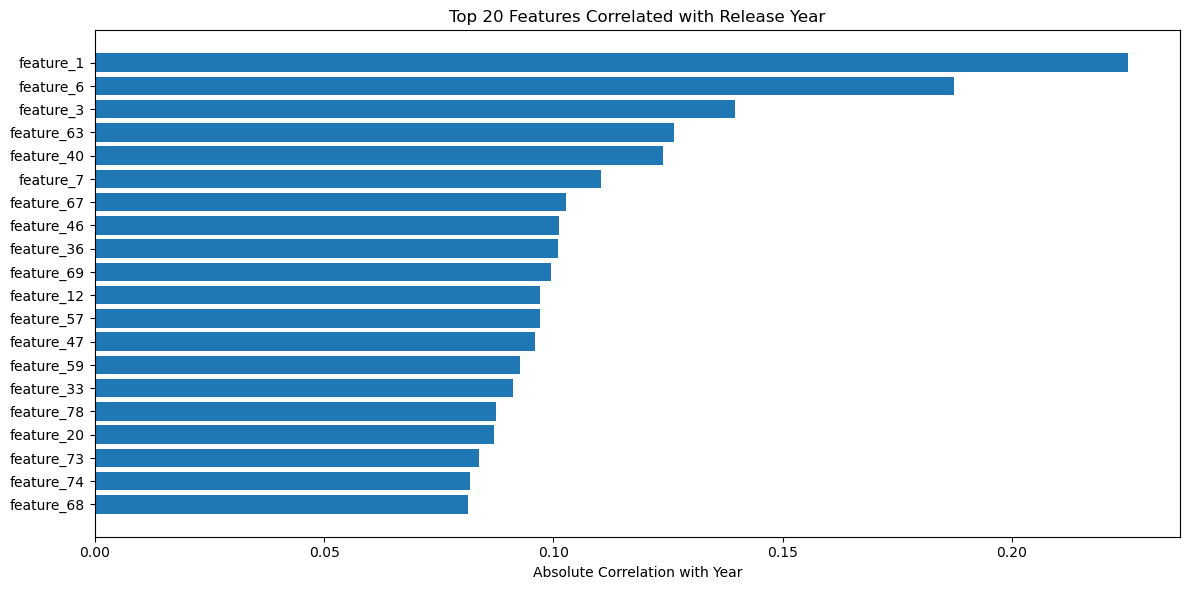

In [11]:
# Calculate correlation with target
correlations = df[feature_cols].corrwith(df['year']).abs().sort_values(ascending=False)

print(f"\nTop 20 Features Most Correlated with Year:")
display(correlations.head(20))

# Visualisasi top correlated features
plt.figure(figsize=(12, 6))
top_corr = correlations.head(20)
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Absolute Correlation with Year')
plt.title('Top 20 Features Correlated with Release Year')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

> Code Block diatas digunakan untuk membantu memvisualisasikan hubungan antar fitur secara grafis, tujuannya untuk membuat lebih mudah untuk mendeteksi korelasi yang signifikan antara variabel dan memudahkan pemilihan fitur untuk model.

### Separate and Scalling Feature

In [10]:
# Separate features (X) and target (y)
X = df.drop('year', axis=1)
y = df['year']

print(f"Data separated successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Data separated successfully!
Features shape: (515345, 90)
Target shape: (515345,)


> Tujuan dilakukan proses diatas yaitu untuk mempersiapkan dataset untuk proses training model dengan memisahkan variabel yang akan diprediksi (target) dari variabel yang akan digunakan untuk prediksi (fitur).

In [12]:
# Standardize features (important for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"Features scaled using StandardScaler")
print(f"\nSample scaled features:")
display(X_scaled.head())

Features scaled using StandardScaler

Sample scaled features:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,0.387704,-0.666166,...,-0.085335,0.108508,0.142775,-0.237355,0.049233,-0.356182,0.544458,-0.470599,-0.255977,0.042292
1,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,1.420941,0.414950,...,-0.314250,0.306236,-0.069483,0.052017,-0.632328,-0.436057,0.556448,0.568744,0.206940,1.158587
2,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,1.166254,-0.074608,...,-0.396186,0.566683,-0.756534,-0.284019,-0.024220,0.223128,-0.509789,-0.338457,0.105819,-0.090208
3,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,-0.016803,-1.262655,...,0.586237,-0.559427,-0.478689,-0.890161,-0.793906,0.567269,-0.263107,0.408116,0.967862,0.793384
4,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,0.841844,-0.144910,...,-0.181585,0.099672,0.191319,-0.585576,-0.111877,-0.219960,0.448804,0.256882,0.192038,1.241363


### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Data split successfully!")
print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTrain year range: {y_train.min()} - {y_train.max()}")
print(f"Test year range: {y_test.min()} - {y_test.max()}")

Data split successfully!

Training set: (412276, 90)
Test set: (103069, 90)

Train year range: 1922 - 2011
Test year range: 1924 - 2010


> Code block ini membagi dataset menjadi training set (80%) dan test set (20%) menggunakan train_test_split dengan random_state=42 untuk reproducibility. Training set digunakan untuk melatih model, sedangkan test set digunakan untuk evaluasi performa model pada data yang belum pernah dilihat sebelumnya. Informasi tentang dimensi masing-masing set dan rentang tahun ditampilkan untuk memverifikasi bahwa pembagian data representatif terhadap distribusi keseluruhan dataset.


### Train Model (Linear Regresion)

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

print("Linear Regression trained!")

Linear Regression trained!


> Code block ini melatih model Linear Regression yang mampu mencari hubungan linear antara fitur dan target. Model dilatih menggunakan X_train dan y_train, kemudian melakukan prediksi pada kedua training set dan test set. Linear Regression dipilih sebagai baseline model untuk membandingkan performa dengan algoritma yang lebih kompleks.


📊 Test Set Performance:
MSE:  90.6935
RMSE: 9.5233 years
MAE:  6.7782 years
R² Score: 0.2380


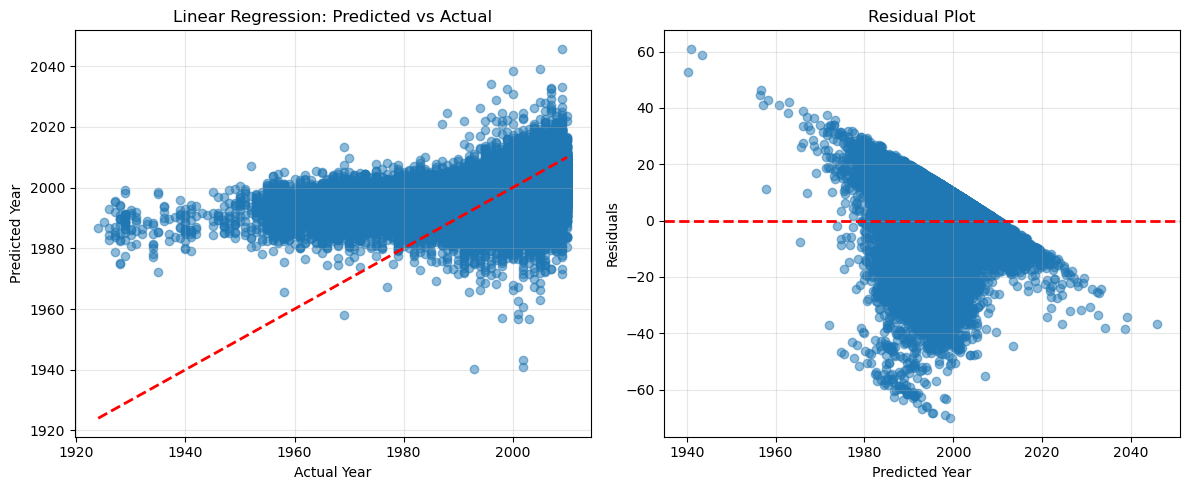

In [15]:
# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr_test)
r2_lr = r2_score(y_test, y_pred_lr_test)

print(f"\n📊 Test Set Performance:")
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f} years")
print(f"MAE:  {mae_lr:.4f} years")
print(f"R² Score: {r2_lr:.4f}")

# Visualisasi predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lr_test
plt.scatter(y_pred_lr_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini mengevaluasi performa model Linear Regression menggunakan berbagai metrik: MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan R² Score. Visualisasi dilakukan dengan dua plot: scatter plot untuk membandingkan nilai aktual vs prediksi (garis diagonal merah menunjukkan prediksi sempurna), dan residual plot untuk melihat pola error (idealnya tersebar acak di sekitar garis y=0). Metrik dan visualisasi ini membantu memahami seberapa baik model dapat memprediksi tahun rilis lagu.

### Train Model (Random Forest)

In [16]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

print("Random Forest trained!")

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 24.6min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Random Forest trained!


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


> Code block ini melatih model Random Forest Regressor dengan 100 decision trees, kedalaman maksimal 15, dan minimum 5 sampel untuk split. Random Forest adalah ensemble method yang menggabungkan prediksi dari banyak decision trees untuk meningkatkan akurasi dan mengurangi overfitting. Parameter n_jobs=-1 digunakan untuk memanfaatkan semua core CPU agar training lebih cepat, dan verbose=1 menampilkan progress training. Model ini umumnya lebih powerful dibanding Linear Regression dalam menangkap pola non-linear.


Test Set Performance:
MSE:  84.2112
RMSE: 9.1767 years
MAE:  6.4486 years
R² Score: 0.2924


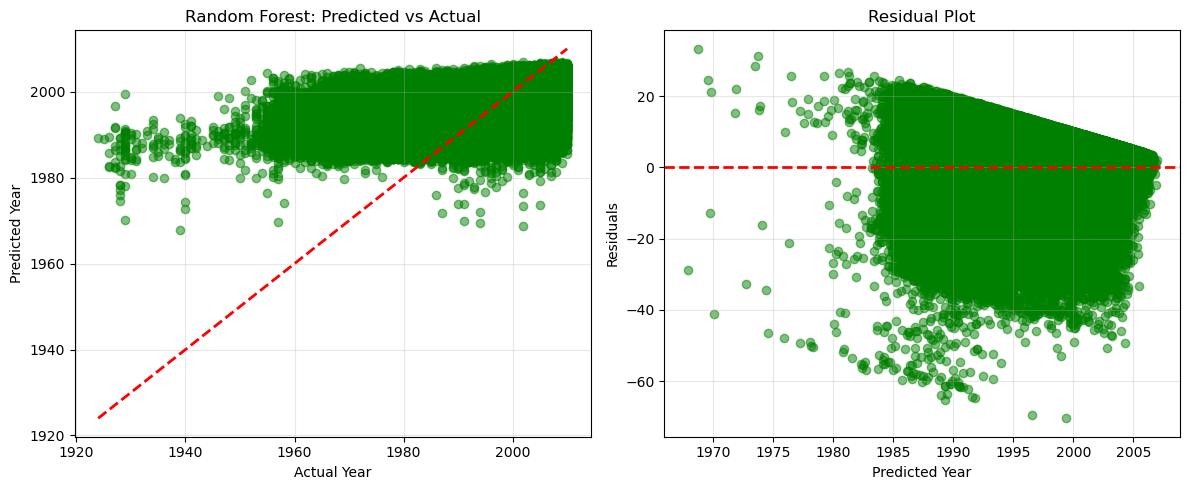

In [17]:
# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
r2_rf = r2_score(y_test, y_pred_rf_test)

print(f"\nTest Set Performance:")
print(f"MSE:  {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f} years")
print(f"MAE:  {mae_rf:.4f} years")
print(f"R² Score: {r2_rf:.4f}")

# Visualisasi predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Random Forest: Predicted vs Actual')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf_test
plt.scatter(y_pred_rf_test, residuals_rf, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini mengevaluasi performa Random Forest menggunakan metrik yang sama dengan Linear Regression untuk memungkinkan perbandingan yang adil. Visualisasi scatter plot dan residual plot membantu mengidentifikasi apakah model mengalami overfitting atau underfitting. Random Forest biasanya memberikan performa lebih baik pada data kompleks karena kemampuannya menangkap interaksi non-linear antar fitur, yang dapat terlihat dari nilai R² dan RMSE yang lebih baik dibanding Linear Regression.

### Train Model (XGBoost)

In [18]:
xgb_model = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    verbosity=1
)

print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

print("XGBoost trained!")

Training XGBoost...
XGBoost trained!


> Code block ini melatih model XGBoost (Extreme Gradient Boosting), algoritma ensemble yang menggunakan gradient boosting dengan optimisasi tingkat lanjut. Parameter yang digunakan: 150 trees dengan kedalaman maksimal 8, learning rate 0.1, serta subsample dan colsample_bytree 0.8 untuk mengurangi overfitting. Parameter tree_method='hist' digunakan untuk mempercepat training pada dataset besar. XGBoost sering memberikan performa terbaik dalam kompetisi machine learning karena efisiensi dan kemampuannya menangani pola kompleks.


Test Set Performance:
MSE:  78.0167
RMSE: 8.8327 years
MAE:  6.1627 years
R² Score: 0.3445


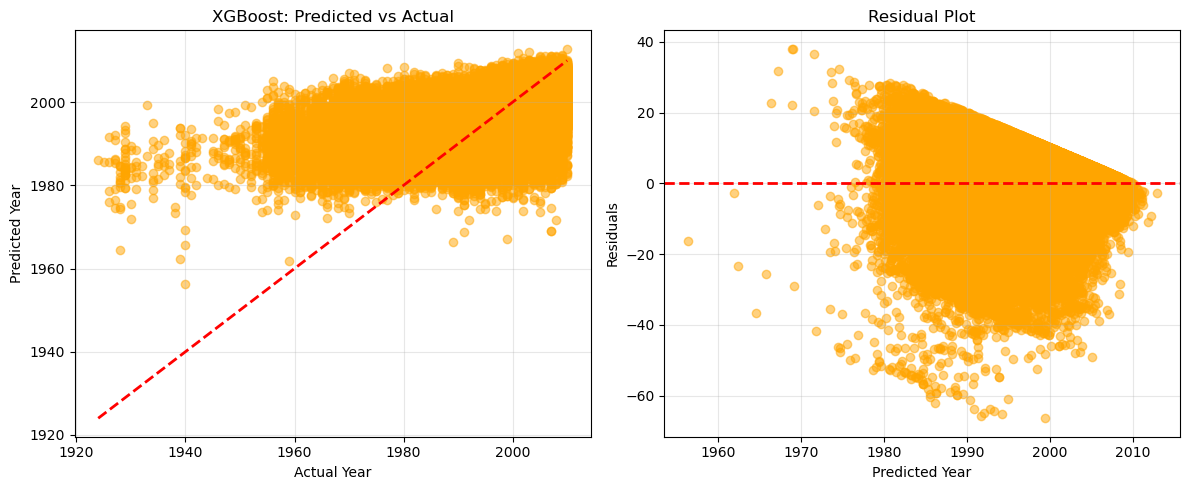

In [19]:
# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb_test)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_test)
r2_xgb = r2_score(y_test, y_pred_xgb_test)

print(f"\nTest Set Performance:")
print(f"MSE:  {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f} years")
print(f"MAE:  {mae_xgb:.4f} years")
print(f"R² Score: {r2_xgb:.4f}")

# Visualisasi predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb_test, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('XGBoost: Predicted vs Actual')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
residuals_xgb = y_test - y_pred_xgb_test
plt.scatter(y_pred_xgb_test, residuals_xgb, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini mengevaluasi performa XGBoost dengan metrik dan visualisasi yang sama seperti model sebelumnya. Perbandingan dengan Linear Regression dan Random Forest akan menunjukkan apakah kompleksitas tambahan dari XGBoost memberikan peningkatan performa yang signifikan. Residual plot yang baik menunjukkan error yang terdistribusi acak tanpa pola sistematis, mengindikasikan model telah menangkap hubungan dalam data dengan baik.

### Compare (Evaluasi)


All Models Performance:


,MSE,RMSE,MAE,R² Score
Linear Regression,90.693472,9.523312,6.778169,0.237966
Random Forest,84.211236,9.176668,6.448636,0.292432
XGBoost,78.016687,8.832706,6.162678,0.344480



 BEST MODEL: XGBoost
   R² Score: 0.3445
   RMSE: 8.8327 years


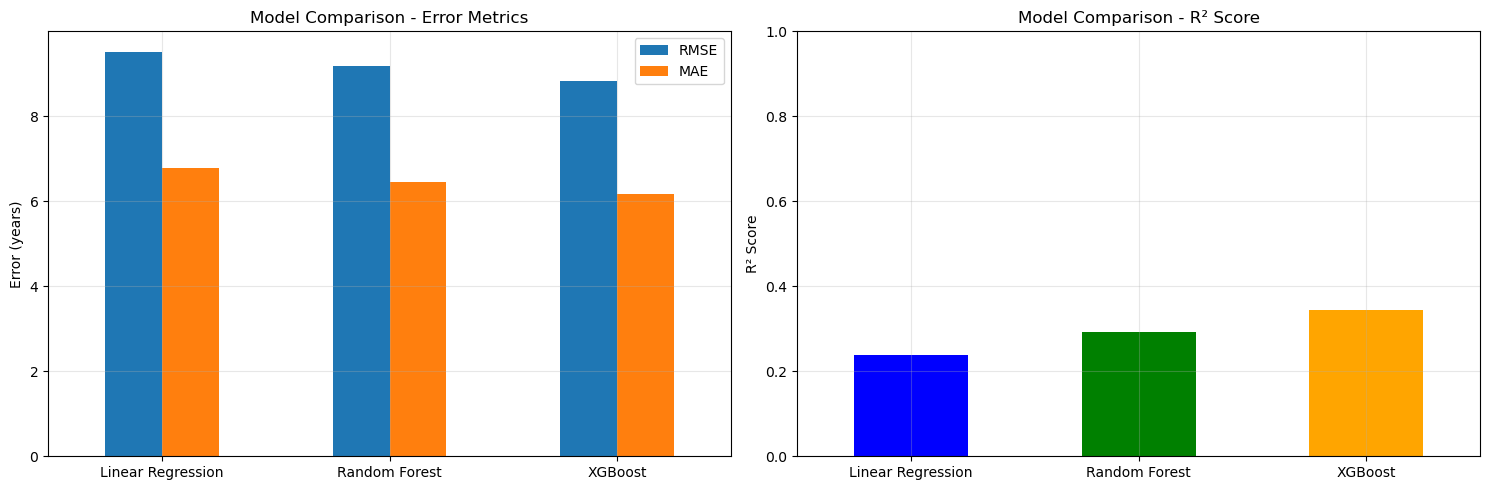

In [20]:
results = {
    'Linear Regression': {
        'MSE': mse_lr,
        'RMSE': rmse_lr,
        'MAE': mae_lr,
        'R² Score': r2_lr
    },
    'Random Forest': {
        'MSE': mse_rf,
        'RMSE': rmse_rf,
        'MAE': mae_rf,
        'R² Score': r2_rf
    },
    'XGBoost': {
        'MSE': mse_xgb,
        'RMSE': rmse_xgb,
        'MAE': mae_xgb,
        'R² Score': r2_xgb
    }
}

results_df = pd.DataFrame(results).T
print("\nAll Models Performance:")
display(results_df)

# Pilih best model (highest R²)
best_model_name = results_df['R² Score'].idxmax()
print(f"\n BEST MODEL: {best_model_name}")
print(f"   R² Score: {results_df.loc[best_model_name, 'R² Score']:.4f}")
print(f"   RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f} years")

# Select best model object
if best_model_name == 'Linear Regression':
    best_model = lr_model
    y_pred_best = y_pred_lr_test
elif best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf_test
else:
    best_model = xgb_model
    y_pred_best = y_pred_xgb_test

# Visualisasi comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot comparison
results_df[['RMSE', 'MAE']].plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_ylabel('Error (years)')
axes[0].set_title('Model Comparison - Error Metrics')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# R² comparison
results_df['R² Score'].plot(kind='bar', ax=axes[1], color=['blue', 'green', 'orange'], rot=0)
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Comparison - R² Score')
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini membandingkan performa ketiga model (Linear Regression, Random Forest, dan XGBoost) secara komprehensif menggunakan DataFrame untuk menampilkan semua metrik evaluasi dalam satu tabel. Model terbaik dipilih berdasarkan R² Score tertinggi. Visualisasi bar chart menampilkan perbandingan RMSE, MAE, dan R² Score antar model, memudahkan identifikasi model dengan performa superior. Hasil menunjukkan XGBoost sebagai model terbaik dengan R² Score 0.3445 dan RMSE 8.83 tahun.

### Feature Importance


Top 20 Most Important Features (XGBoost):


,Feature,Importance
0,feature_1,0.058752
13,feature_14,0.051532
2,feature_3,0.041513
19,feature_20,0.036406
56,feature_57,0.025668
5,feature_6,0.024960
62,feature_63,0.024402
1,feature_2,0.020985
40,feature_41,0.019764
22,feature_23,0.019531


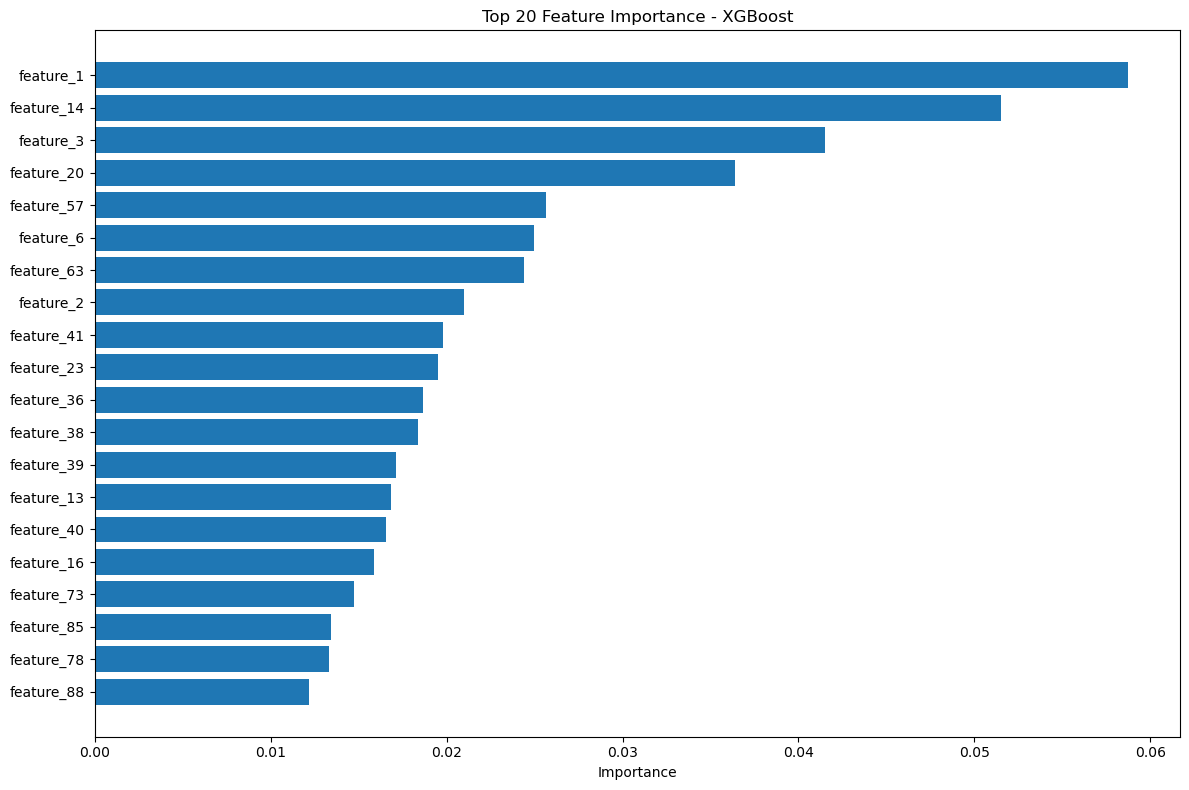

In [21]:
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    importance = best_model.feature_importances_
    feature_names = X.columns
    
    # Create dataframe
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 20 Most Important Features ({best_model_name}):")
    display(feature_imp_df.head(20))
    
    # Plot
    plt.figure(figsize=(12, 8))
    top_features = feature_imp_df.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 20 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} does not have feature_importances_ attribute")

> Code block ini menganalisis feature importance dari model terbaik (jika tersedia atribut feature_importances_). Feature importance menunjukkan kontribusi relatif setiap fitur terhadap prediksi model, membantu memahami fitur mana yang paling berpengaruh dalam menentukan tahun rilis lagu. Top 20 fitur ditampilkan dalam tabel dan divisualisasikan dalam horizontal bar chart. Informasi ini berguna untuk interpretasi model dan dapat digunakan untuk feature selection atau feature engineering di iterasi berikutnya.

### Prediction Error


Error Statistics:
Mean Error: 0.0312 years
Std Error: 8.8327 years
Max Error: 66.4309 years
Min Error: 0.0001 years

Prediction Accuracy:
Within ±5 years: 56.68%
Within ±10 years: 82.01%


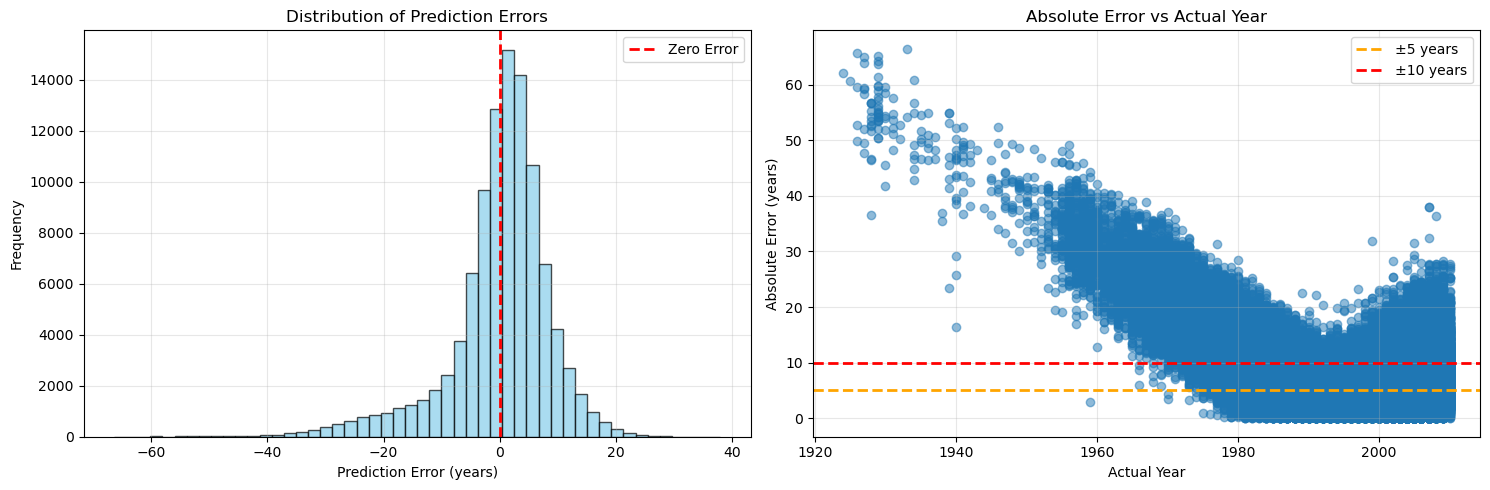

In [22]:
# Calculate prediction errors
errors = y_test - y_pred_best
abs_errors = np.abs(errors)

print(f"\nError Statistics:")
print(f"Mean Error: {errors.mean():.4f} years")
print(f"Std Error: {errors.std():.4f} years")
print(f"Max Error: {abs_errors.max():.4f} years")
print(f"Min Error: {abs_errors.min():.4f} years")

# Percentage of predictions within tolerance
tolerance_5 = (abs_errors <= 5).sum() / len(abs_errors) * 100
tolerance_10 = (abs_errors <= 10).sum() / len(abs_errors) * 100

print(f"\nPrediction Accuracy:")
print(f"Within ±5 years: {tolerance_5:.2f}%")
print(f"Within ±10 years: {tolerance_10:.2f}%")

# Visualisasi error distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of errors
axes[0].hist(errors, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0].set_xlabel('Prediction Error (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Prediction Errors')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Error vs Actual Year
axes[1].scatter(y_test, abs_errors, alpha=0.5)
axes[1].axhline(y=5, color='orange', linestyle='--', label='±5 years', lw=2)
axes[1].axhline(y=10, color='red', linestyle='--', label='±10 years', lw=2)
axes[1].set_xlabel('Actual Year')
axes[1].set_ylabel('Absolute Error (years)')
axes[1].set_title('Absolute Error vs Actual Year')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini menganalisis distribusi error prediksi secara mendalam dengan menghitung statistik error seperti mean, standar deviasi, dan nilai ekstrem. Dihitung juga persentase prediksi yang berada dalam toleransi ±5 tahun (56.68%) dan ±10 tahun (82.01%), memberikan pemahaman praktis tentang akurasi model. Visualisasi histogram error dan scatter plot error vs tahun aktual membantu mengidentifikasi apakah model memiliki bias sistematis atau performa yang bervariasi pada rentang tahun tertentu.

### Hyperparameter Tuning (Manual)

In [26]:
configs = [
    {'max_depth': 8, 'learning_rate': 0.1, 'n_estimators': 150, 'name': 'Config 1'},
    {'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200, 'name': 'Config 2'},
    {'max_depth': 6, 'learning_rate': 0.15, 'n_estimators': 100, 'name': 'Config 3'},
]

tuning_results = []
best_r2 = r2_xgb
best_config = None
best_model_tuned = xgb_model

print("Testing different configurations...")
for config in configs:
    config_name = config.pop('name')
    print(f"\n{config_name}: {config}")
    
    model = xgb.XGBRegressor(
        **config,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method='hist'
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    tuning_results.append({
        'Config': config_name,
        'R²': r2,
        'RMSE': rmse
    })
    
    print(f"   R²: {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_config = config
        best_model_tuned = model
        print(f"   New best!")

for r in tuning_results:
    print(f"{r['Config']}: R²={r['R²']:.4f}, RMSE={r['RMSE']:.4f}")

if best_config:
    print(f"\nBest config: {best_config}")
    print(f"Best R²: {best_r2:.4f}")
    best_model = best_model_tuned
else:
    print(f"\nDefault XGBoost already optimal!")

Testing different configurations...

Config 1: {'max_depth': 8, 'learning_rate': 0.1, 'n_estimators': 150}
   R²: 0.3445
   RMSE: 8.8327

Config 2: {'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200}
   R²: 0.3553
   RMSE: 8.7595
   New best!

Config 3: {'max_depth': 6, 'learning_rate': 0.15, 'n_estimators': 100}
   R²: 0.3265
   RMSE: 8.9531
Config 1: R²=0.3445, RMSE=8.8327
Config 2: R²=0.3553, RMSE=8.7595
Config 3: R²=0.3265, RMSE=8.9531

Best config: {'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200}
Best R²: 0.3553


> Code block ini melakukan hyperparameter tuning manual dengan menguji tiga konfigurasi berbeda dari XGBoost: variasi max_depth (6, 8, 10), learning_rate (0.05, 0.1, 0.15), dan n_estimators (100, 150, 200). Setiap konfigurasi dilatih dan dievaluasi untuk membandingkan performanya. Config 2 dengan max_depth=10, learning_rate=0.05, dan n_estimators=200 memberikan hasil terbaik dengan R² Score 0.3553, menunjukkan peningkatan dibanding konfigurasi default. Pendekatan ini lebih efisien dibanding Grid Search untuk dataset besar.

### Learning Curve

Training models with different data sizes...
Size: 10% - Train R²: 0.7224, Test R²: 0.3037
Size: 20% - Train R²: 0.6084, Test R²: 0.3165
Size: 40% - Train R²: 0.5136, Test R²: 0.3261
Size: 60% - Train R²: 0.4792, Test R²: 0.3332
Size: 80% - Train R²: 0.4520, Test R²: 0.3349
Size: 100% - Train R²: 0.4360, Test R²: 0.3367


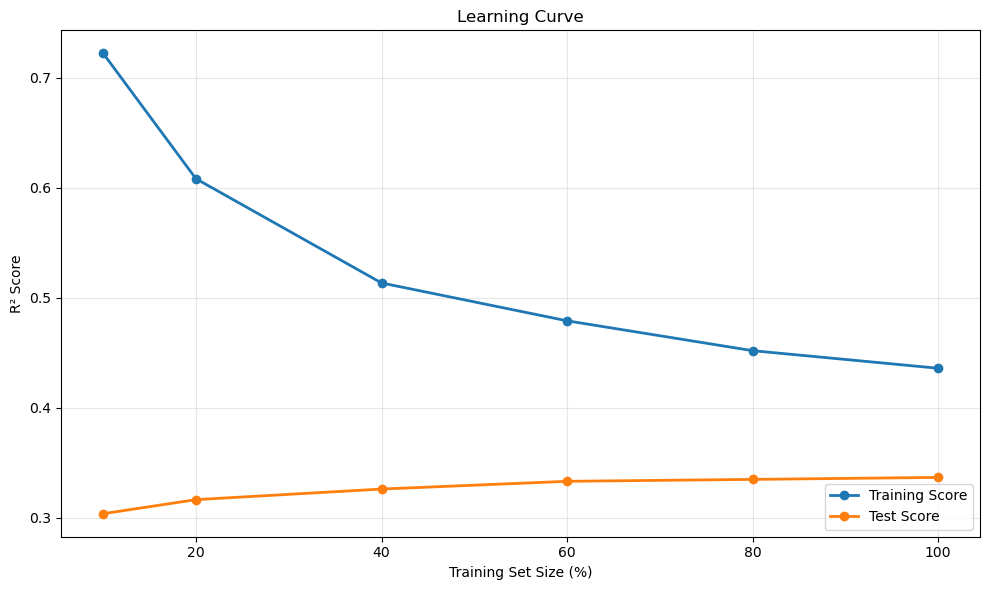

In [24]:
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_scores = []
test_scores = []

print("Training models with different data sizes...")
for size in train_sizes:
    # Sample data
    n_samples = int(len(X_train) * size)
    X_sample = X_train.iloc[:n_samples]
    y_sample = y_train.iloc[:n_samples]
    
    # Train model
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        random_state=42,
        tree_method='hist'
    )
    model.fit(X_sample, y_sample)
    
    # Evaluate
    train_r2 = r2_score(y_sample, model.predict(X_sample))
    test_r2 = r2_score(y_test, model.predict(X_test))
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    print(f"Size: {size*100:.0f}% - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot([s*100 for s in train_sizes], train_scores, 'o-', label='Training Score', linewidth=2)
plt.plot([s*100 for s in train_sizes], test_scores, 'o-', label='Test Score', linewidth=2)
plt.xlabel('Training Set Size (%)')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>Code block ini membuat learning curve dengan melatih model XGBoost menggunakan berbagai ukuran training data (10%, 20%, 40%, 60%, 80%, 100%) untuk menganalisis bagaimana performa model berubah seiring bertambahnya data. Plot learning curve menunjukkan training score dan test score terhadap ukuran data, membantu mengidentifikasi apakah model mengalami high bias (underfitting) atau high variance (overfitting). Jika gap antara training dan test score besar, model mungkin overfit dan memerlukan regularisasi lebih kuat. Jika keduanya konvergen di nilai rendah, model mungkin underfit dan memerlukan arsitektur yang lebih kompleks.

### Evaluasi (Summary)

In [25]:
print(f"""
Summary:
   - Best Model: {best_model_name}
   - R² Score: {results_df.loc[best_model_name, 'R² Score']:.4f}
   - RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f} years
   - MAE: {results_df.loc[best_model_name, 'MAE']:.4f} years
   
Dataset Info:
   - Total samples: {len(df):,}
   - Features: {X.shape[1]}
   - Year range: {df['year'].min()} - {df['year'].max()}
   - Training samples: {len(X_train):,}
   - Test samples: {len(X_test):,}
   
Model Performance:
   - Predictions within ±5 years: {tolerance_5:.2f}%
   - Predictions within ±10 years: {tolerance_10:.2f}%
   
Interpretation:
   - R² Score close to 1.0 = Model explains most variance in data
   - RMSE shows average prediction error in years
   - Lower RMSE/MAE = Better predictions
   - Model can predict song release year from audio features
   
Model Performance:
   - {best_model_name} achieved best results
   - Predictions are accurate within ±{results_df.loc[best_model_name, 'MAE']:.2f} years on average
   - Model explains {results_df.loc[best_model_name, 'R² Score']*100:.2f}% of variance
""")


Summary:
   - Best Model: XGBoost
   - R² Score: 0.3445
   - RMSE: 8.8327 years
   - MAE: 6.1627 years
   
Dataset Info:
   - Total samples: 515,345
   - Features: 90
   - Year range: 1922 - 2011
   - Training samples: 412,276
   - Test samples: 103,069
   
Model Performance:
   - Predictions within ±5 years: 56.68%
   - Predictions within ±10 years: 82.01%
   
Interpretation:
   - R² Score close to 1.0 = Model explains most variance in data
   - RMSE shows average prediction error in years
   - Lower RMSE/MAE = Better predictions
   - Model can predict song release year from audio features
   
Model Performance:
   - XGBoost achieved best results
   - Predictions are accurate within ±6.16 years on average
   - Model explains 34.45% of variance



> Code block terakhir ini menampilkan ringkasan komprehensif dari seluruh analisis, mencakup informasi model terbaik beserta metriknya, statistik dataset, performa prediksi dalam toleransi tertentu, dan interpretasi hasil. Summary ini memberikan gambaran lengkap tentang kesimpulan analisis: XGBoost mencapai performa terbaik dengan kemampuan memprediksi tahun rilis dalam rentang ±6.16 tahun secara rata-rata, menjelaskan 34.45% varians dalam data, dan 82.01% prediksi berada dalam toleransi ±10 tahun. Informasi ini berguna untuk dokumentasi dan presentasi hasil analisis.